# Problem Statement

The dataset is similar to MNIST but includes images of
certain clothing and accessory. The objective is to
classify images into specific classes using a single-layer
perceptron & multilayer perceptron.

In [ ]:
# Basic Libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
# Deep Learning library
from tensorflow import keras
import tensorflow as tf

In [ ]:
from keras.utils import *
from keras.models import *
from keras.layers import *
from keras.optimizers import *

In [ ]:
# Loading Mnist data Set
mnist_fash = keras.datasets.fashion_mnist

In [ ]:
# Spliting it into Traning and Testing data set
(X_train,Y_train),(X_test, Y_test)=mnist_fash.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Shape of data set
print(X_train.shape)
X_test.shape

(60000, 28, 28)


(10000, 28, 28)

In [ ]:
def unique_array(arr):
    print('Unique label',np.unique(arr))
    print(pd.DataFrame(Y_train)[0].value_counts())
    return len(np.unique(arr))

In [ ]:
unique_array(Y_train)

Unique label [0 1 2 3 4 5 6 7 8 9]
9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64


10

In [ ]:
X_train.min(),X_train.max()

(0, 255)

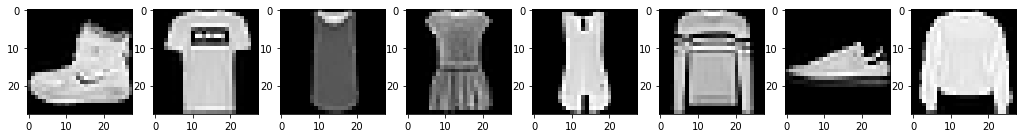

In [ ]:
## Plot the images that are their in the X_dataset
plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(1,9,i+1)
    plt.imshow(X_train[i], cmap='gray')

In [ ]:
df =pd.DataFrame({0 : 'T-shirt/top',1:'Trouser',2:'Pullover',3:'Drees',4 : 'Coat',5 : 'Sandal',6 : 'Shirt',7 : 'Sneaker',8 : 'Bag'
 ,9 : 'Ankle boot'}.items())

In [ ]:
for i in range(0,9):
    temp = Y_train[i]
    
    

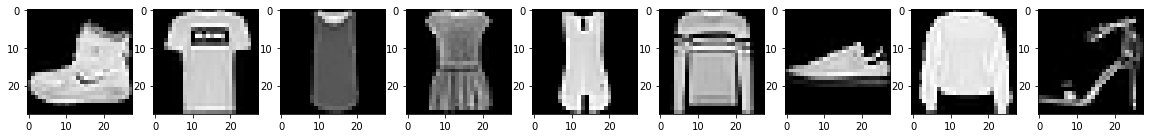

In [ ]:
#### Plot the images that are their in the X_dataset
plt.figure(figsize = (20,15))
for i in range(9):
  plt.subplot(1,9,i+1)
  plt.imshow(X_train[i],cmap = 'gray')  

In [ ]:
X_train_test = X_train.copy()

In [ ]:
X_test_test = X_test.copy()

In [ ]:
X_train_test.shape[0]

60000

In [ ]:
def net_atapreprocessing_x(x):
    x = x.astype('float32')
    x = x/255
    x = x.reshape(x.shape[0],x.shape[1]*x.shape[2])
    return x

In [ ]:
def net_atapreprocessing_y(y):
    return tf.keras.utils.to_categorical(y, 10, dtype='float32')

In [ ]:
X_train = net_atapreprocessing_x(X_train_test)

In [ ]:
X_test = net_atapreprocessing_x(X_test_test)

In [ ]:
Y_train = net_atapreprocessing_y(Y_train)

In [ ]:
Y_test = net_atapreprocessing_y(Y_test)

SGD
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Model :  0
Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 1.4212 - accuracy: 0.5809 - val_loss: 0.8576 - val_accuracy: 0.7127
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.8089 - accuracy: 0.7389 - val_loss: 0.7378 - val_accuracy: 0.7522
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.7004 - accuracy: 0.7771 - val_loss: 0.6828 - val_accuracy: 0.7728
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.6617 - accuracy: 0.7866 - val_loss: 0.6479 - val_accuracy: 0.7830
Epoch 5/30
469/469 [==============================] - 1s 2ms/s

<Figure size 432x288 with 0 Axes>

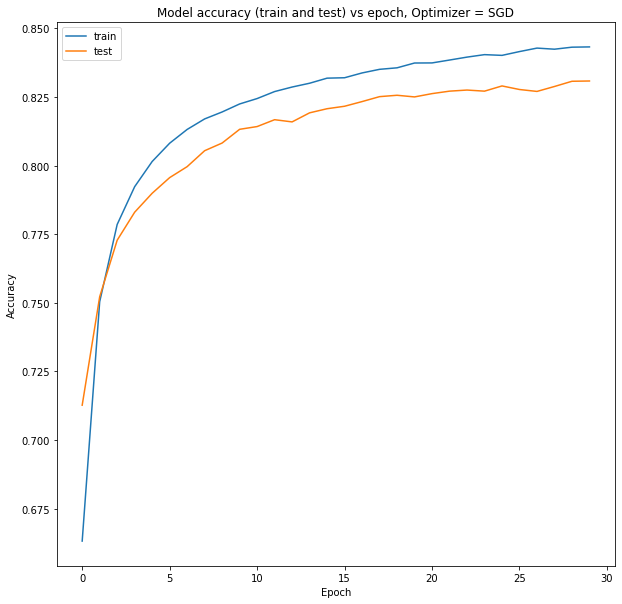

<Figure size 432x288 with 0 Axes>

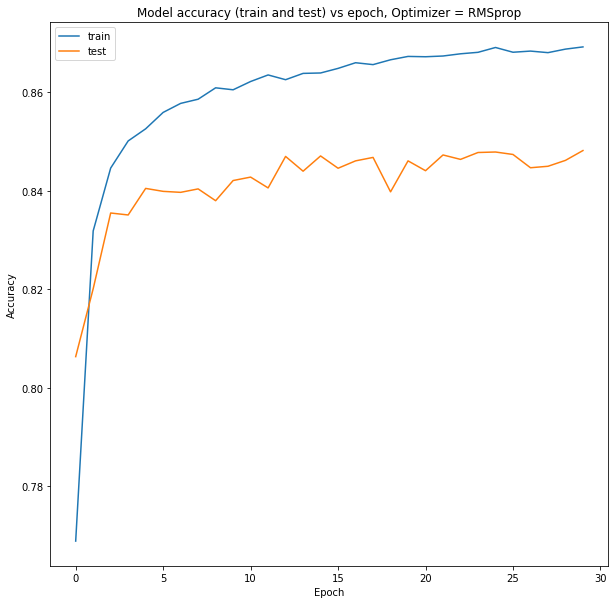

<Figure size 432x288 with 0 Axes>

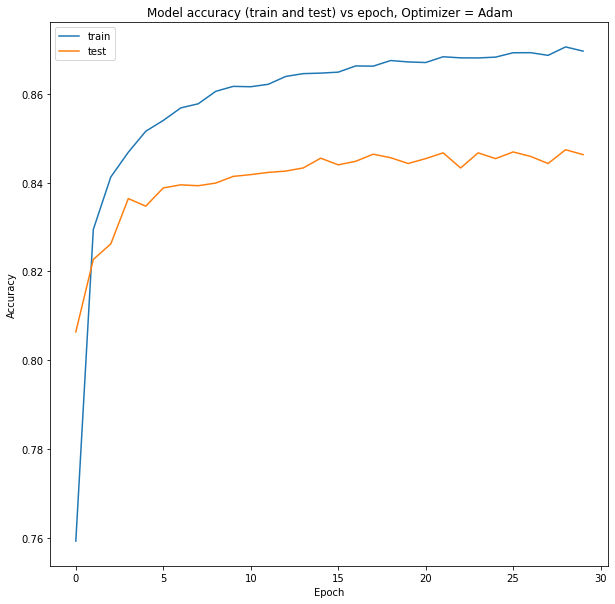

<Figure size 432x288 with 0 Axes>

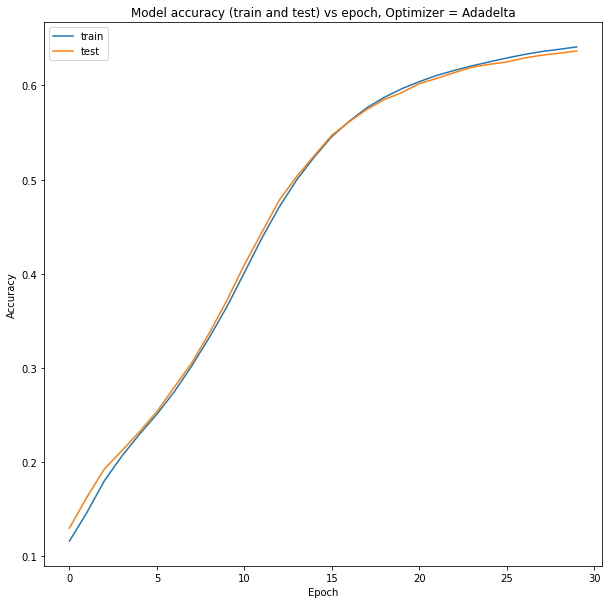

<Figure size 432x288 with 0 Axes>

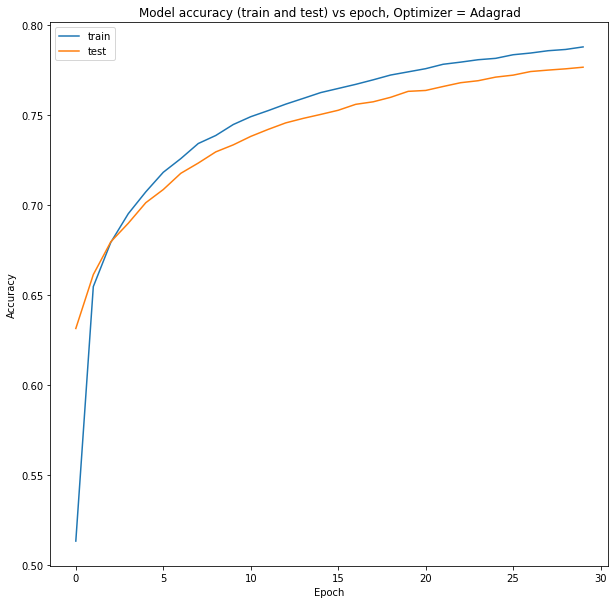

<Figure size 432x288 with 0 Axes>

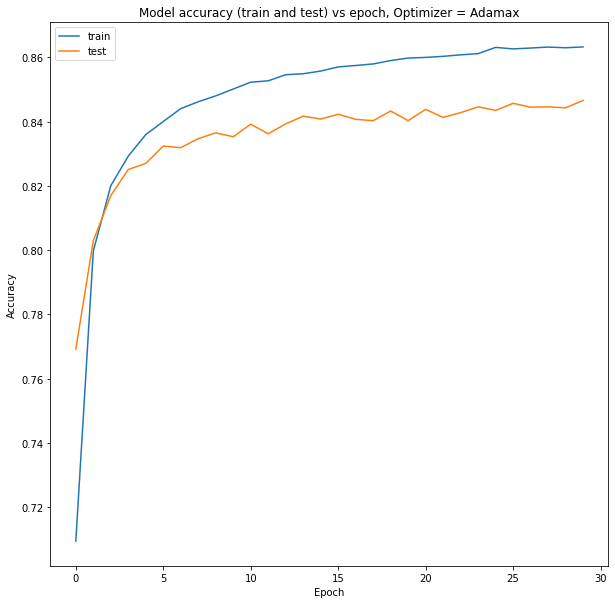

<Figure size 432x288 with 0 Axes>

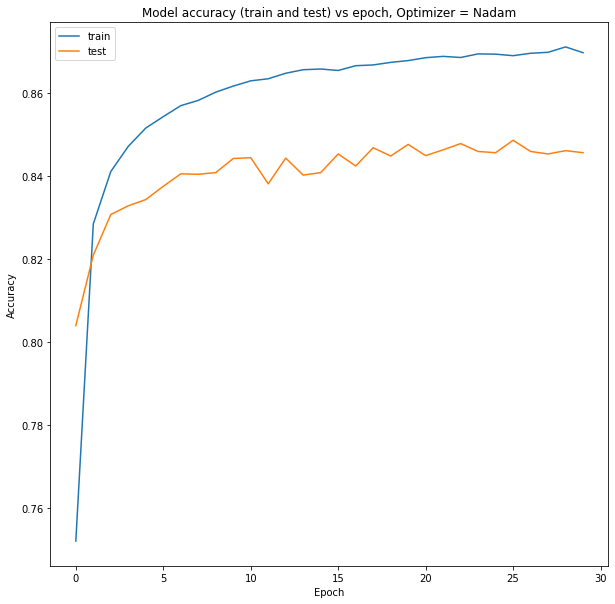

<Figure size 432x288 with 0 Axes>

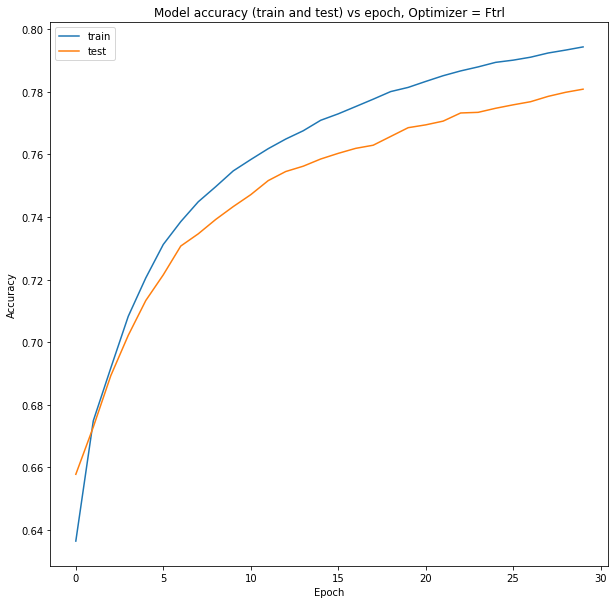

In [ ]:

list_temp = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
for i in range(0,len(list_temp)):
  print(list_temp[i])
  model = Sequential()
  model.add(InputLayer(input_shape=(X_train.shape[1],)))
  model.add(Dense(10,activation = 'softmax'))
  model.summary()
  print('Model : ',i)
  model.compile(loss='categorical_crossentropy',optimizer=list_temp[i],metrics=['accuracy'])
  model_history = model.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))
  
  test = plt.figure()
  plt.figure(figsize = (10,10))
  plt.plot(model_history.history['accuracy'])
  plt.plot(model_history.history['val_accuracy'])
  plt.title("Model accuracy (train and test) vs epoch, Optimizer = "+list_temp[i])
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(['train','test'],loc = 'upper left')
  test.show()
  print()
  test_loss, test_acc = model.evaluate(X_test,Y_test,verbose=2)
  print('Loss',test_loss)
  print('Accuracy', test_acc)
  print('Accuracy on Test Data')
  print(list_temp[i])
  # test.savefig(list_temp[i]+'.png')
  # files.download(list_temp[i]+'.png')

In [ ]:
#### Tuned parameter : Optimiser

model1 = Sequential()
model1.add(InputLayer(input_shape=(X_train.shape[1],)))
model1.add(Dense(10,activation = 'softmax'))
model1.summary()
# Compile the model
model1.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
# epochs = 30,batch_size =128, validation_data = (X_test,Y_test)
## Training the mode
model1_history = model1.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 1.0278 - accuracy: 0.6635 - val_loss: 0.5760 - val_accuracy: 0.8064
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.8252 - val_loss: 0.5171 - val_accuracy: 0.8229
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.4782 - accuracy: 0.8399 - val_loss: 0.4936 - val_accuracy: 0.8291
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.4569 - accuracy: 0.8457 - val_loss: 0.4766 - val_accuracy: 0.8342
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.4

In [ ]:
##Evaluate the model based on the accuarcy

In [ ]:
test_loss, test_acc = model1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.8459


In [ ]:
# Ploting the predictions of the model against the orignal test images

In [ ]:
probability_model1 = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])

In [ ]:
prediction1 = probability_model1.predict(X_test)

In [ ]:
np.argmax(prediction1[0])

9

In [ ]:
class_names =['T-shirt/top','Trouser','Pullover','Dress','Caot','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
def plot_image(i, predictions_arry, true_label, img):
  predictions_arry, true_label, img = predictions_arry, true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_arry)
  if predicted_label == np.argmax(true_label):
    color ='blue'
  else:
    color ='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_arry),
                                       class_names[np.argmax(true_label)]),color=color)
  


In [ ]:
  def plot_value_array(i, predictions_array,true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color ='#777777')
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

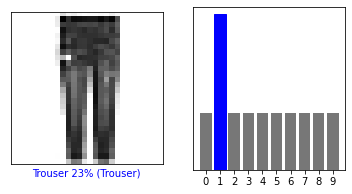

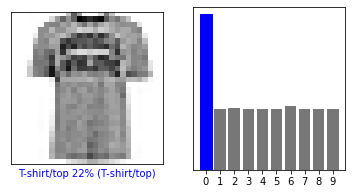

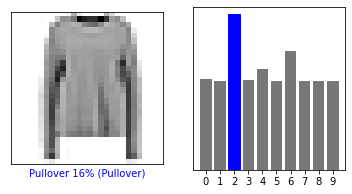

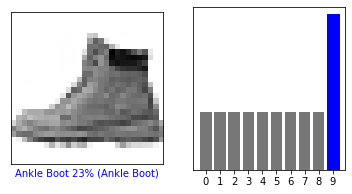

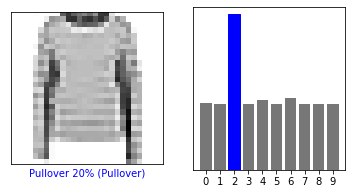

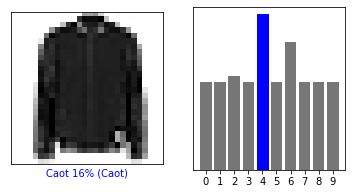

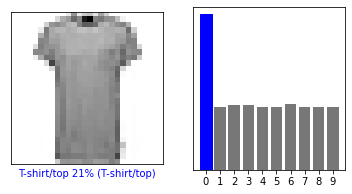

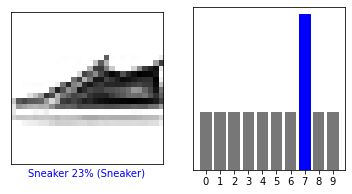

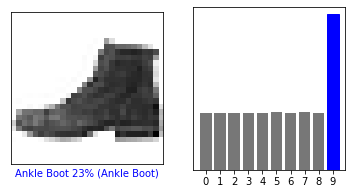

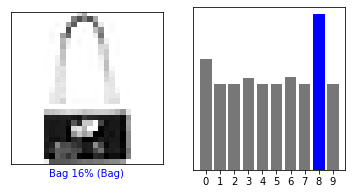

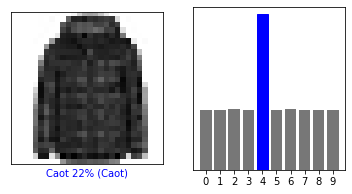

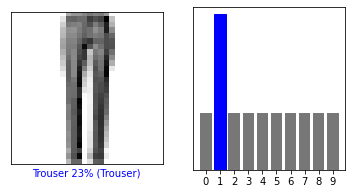

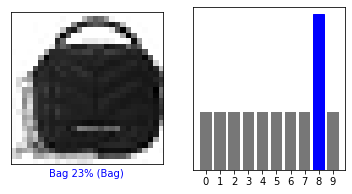

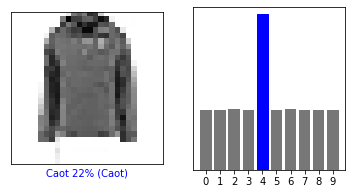

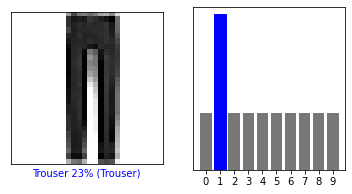

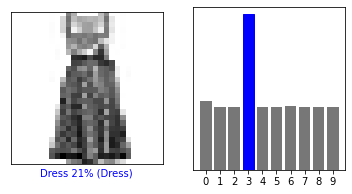

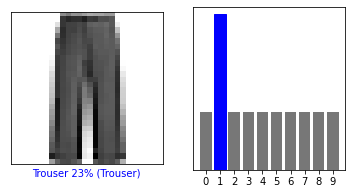

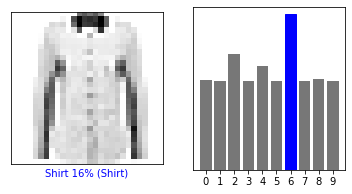

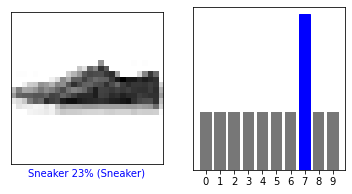

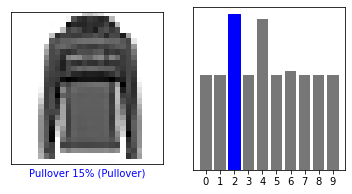

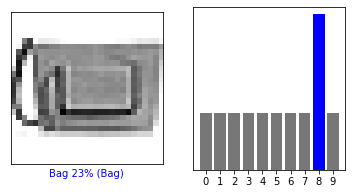

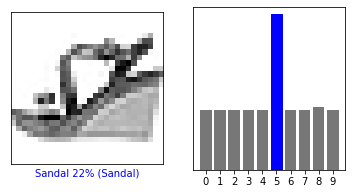

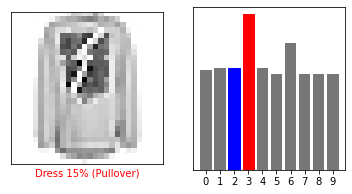

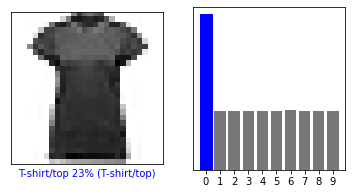

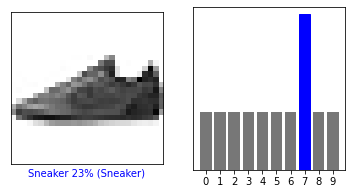

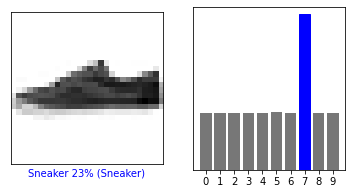

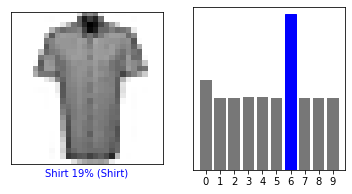

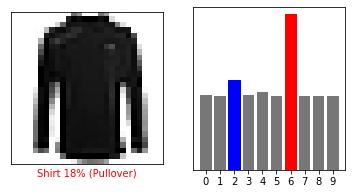

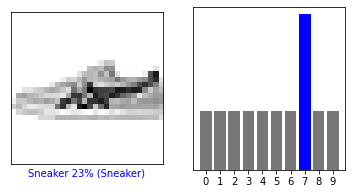

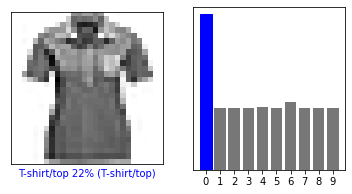

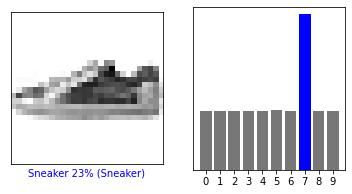

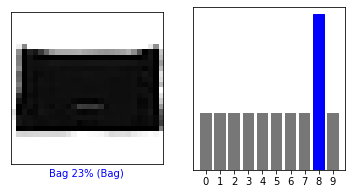

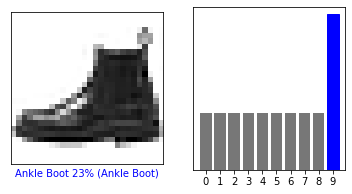

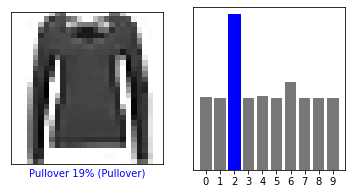

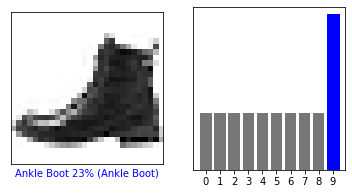

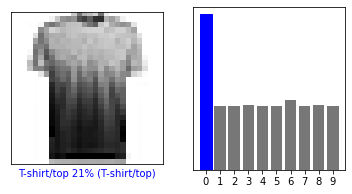

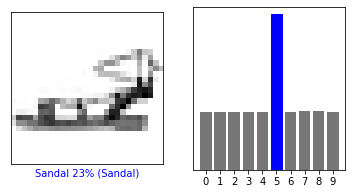

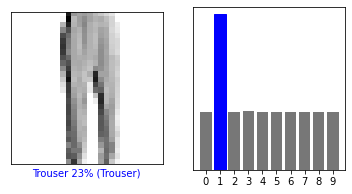

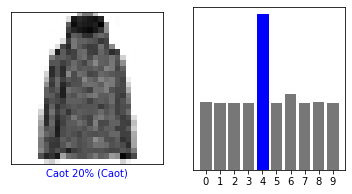

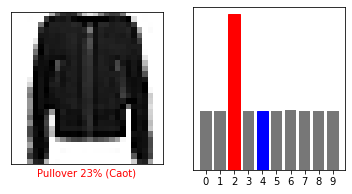

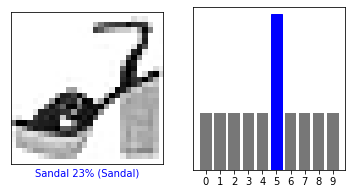

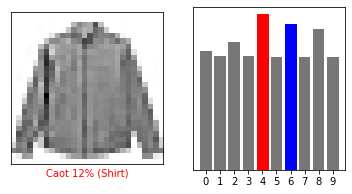

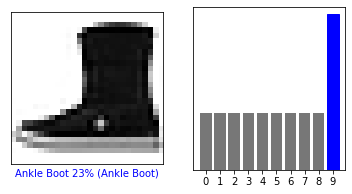

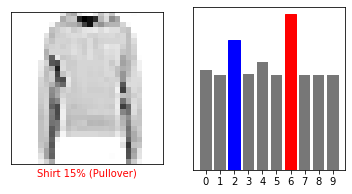

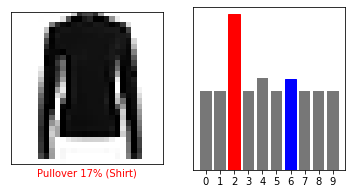

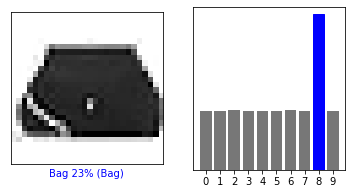

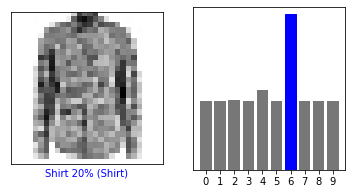

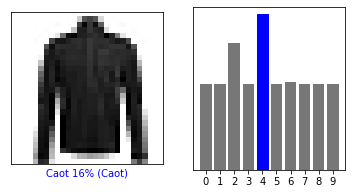

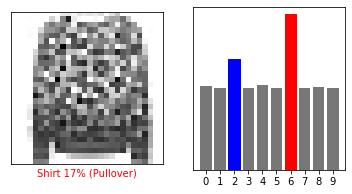

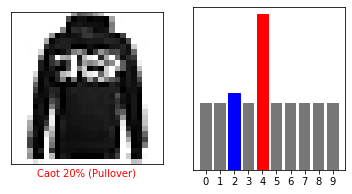

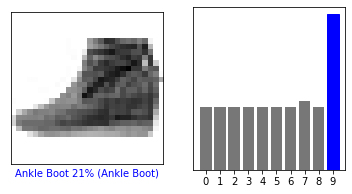

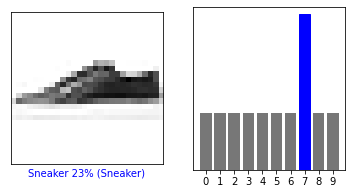

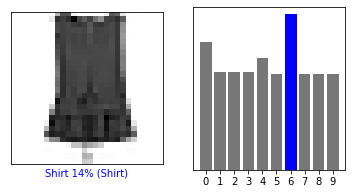

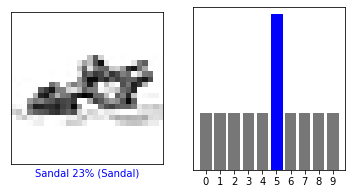

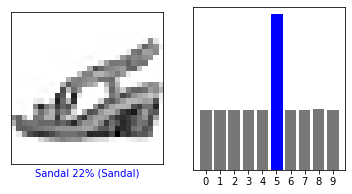

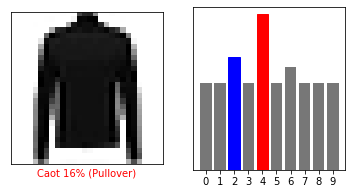

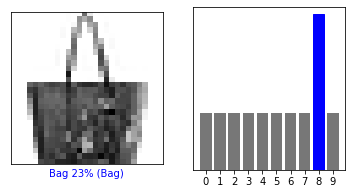

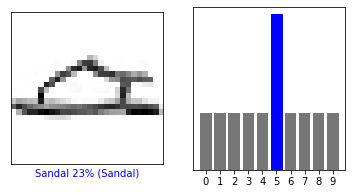

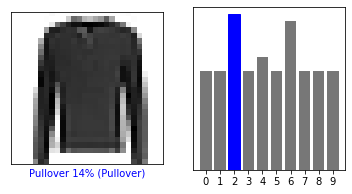

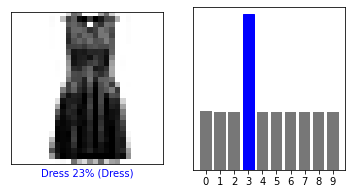

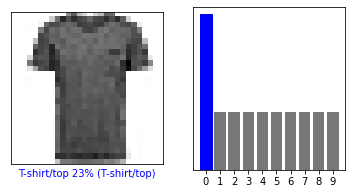

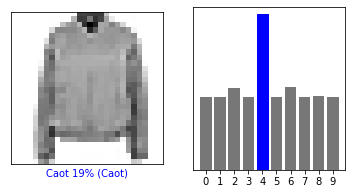

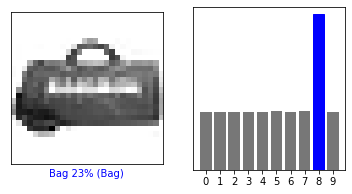

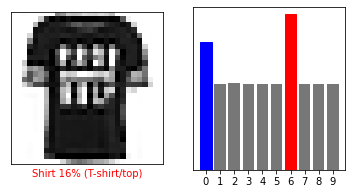

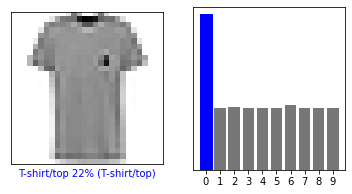

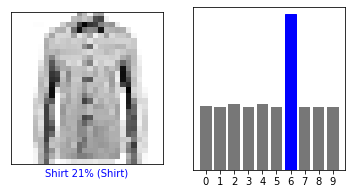

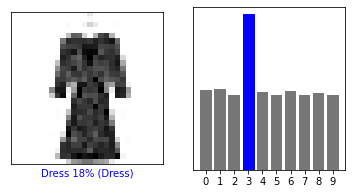

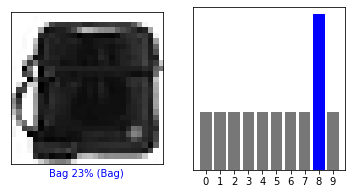

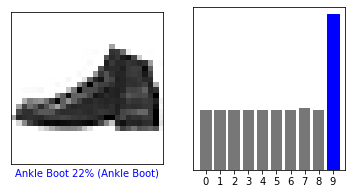

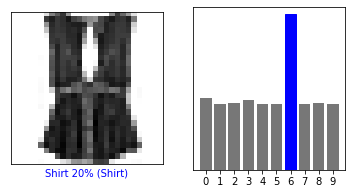

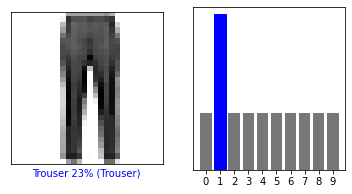

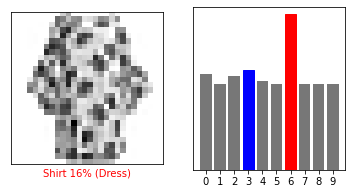

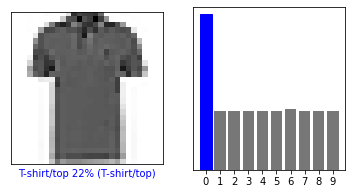

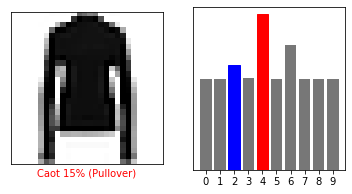

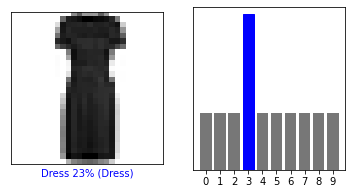

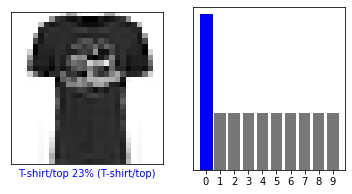

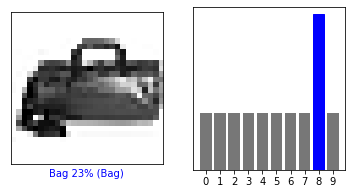

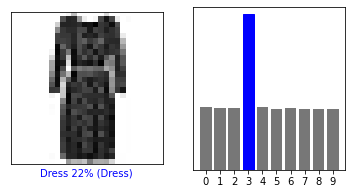

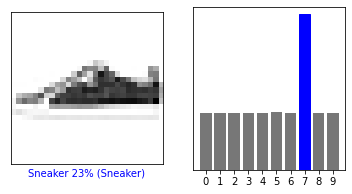

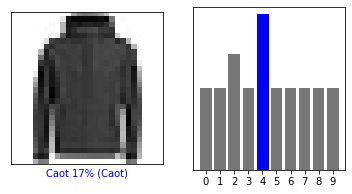

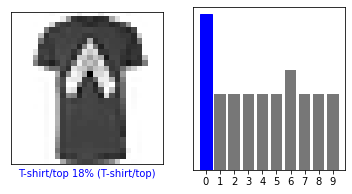

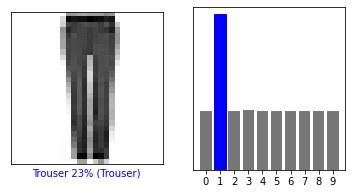

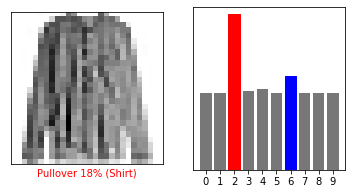

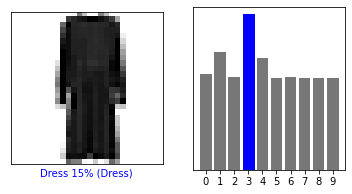

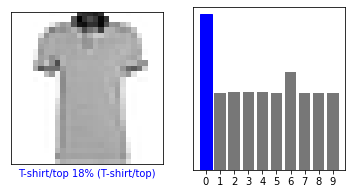

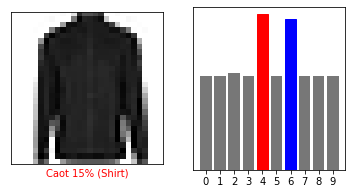

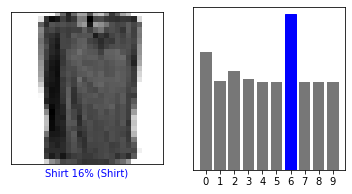

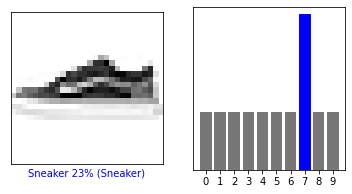

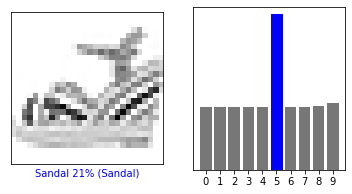

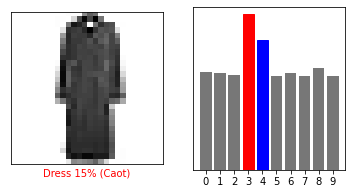

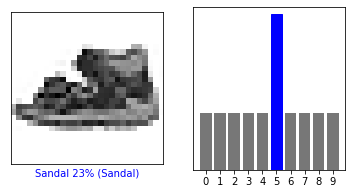

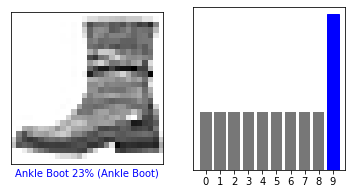

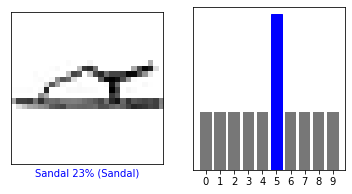

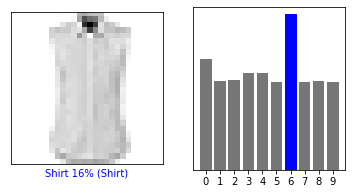

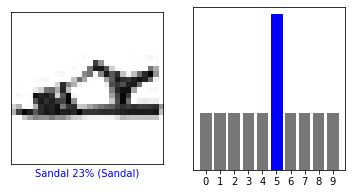

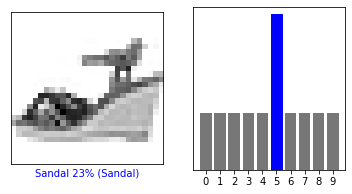

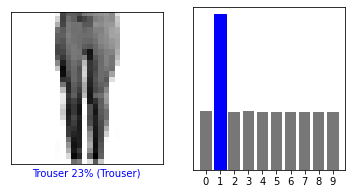

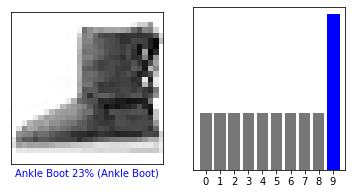

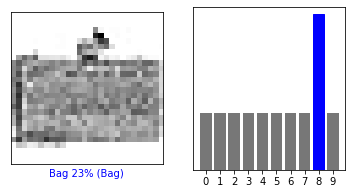

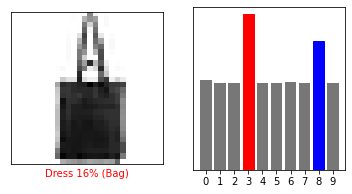

In [ ]:
for j in range(200,300):
  i=j
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction1[i], Y_test, X_test_test)
  plt.subplot(1,2,2)
  plot_value_array(i, prediction1[i], Y_test)
  plt.show()

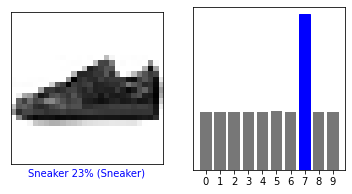

In [ ]:
i = 22 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction1[i], Y_test, X_test_test)
plt.subplot(1,2,2)
plot_value_array(i, prediction1[i], Y_test)
plt.show()

Adding two dense layer

In [ ]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(X_train.shape[1],)))
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(32,activation = 'relu')) # Adding one more layer
model2.add(Dense(10,activation = 'softmax'))

print(model2.summary())

# Compile the model

model2.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

## Training the model

model2_history = model2.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))



Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.8729 - accuracy: 0.7080 - val_loss: 0.4746 - val_accuracy: 0.8326
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.4325 - accuracy: 0.8484 - val_loss: 0.4294 - val_accuracy: 0.8494
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3865 - accurac


313/313 - 0s - loss: 0.6625 - accuracy: 0.7808
Loss 0.6625332236289978
Accuracy 0.7807999849319458
Accuracy on Test Data


<Figure size 432x288 with 0 Axes>

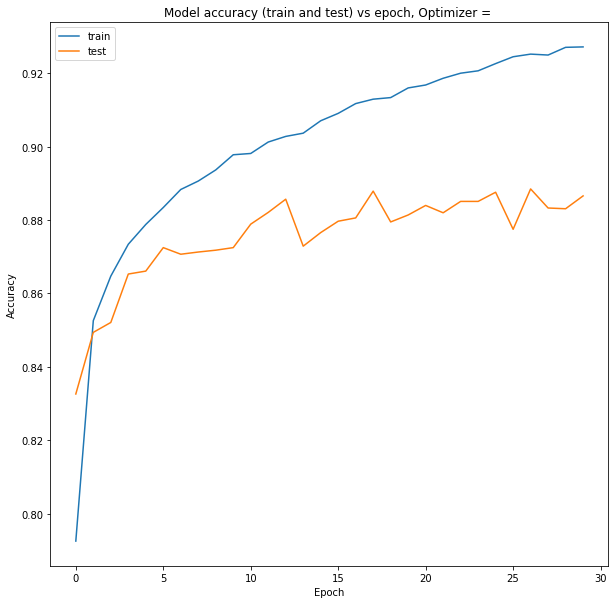

In [ ]:
test = plt.figure()
plt.figure(figsize = (10,10))
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title("Model accuracy (train and test) vs epoch, Optimizer = ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc = 'upper left')
test.show()
print()
test_loss, test_acc = model.evaluate(X_test,Y_test,verbose=2)
print('Loss',test_loss)
print('Accuracy', test_acc)
print('Accuracy on Test Data')
# print(list_temp)

In [ ]:
probability_model = tf.keras.Sequential([model2, tf.keras.layers.Softmax()])
prediction = probability_model.predict(X_test)

In [ ]:
test_loss, test_acc = model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8866


**Note 1 :**

1.Model1 with no hidden layer,over train data : val_loss : 0.3742, accuracy : 0.8687

2.Model1 with no hidden layer, over test data : val_loss : 0.4355, accuracy : 0.8484

**Note 2:**

1.Model2 with two hidden layer, over train data : val_loss : 0.1863, accuracy : 0.9315

2.Model1 with two hidden layer, over test data : val_loss : 0.3678, accuracy : 0.8856


With adding two hidden layers accuracy of the model has increased and loss has reduce.
From validation curve there is chance of overfitting as vertical distance between test and train has increased.

Now increasing number of neurons at each layer

In [ ]:
model3 = Sequential()
model3.add(InputLayer(input_shape=(X_train.shape[1],)))
model3.add(Dense(256,activation = 'relu')) # from 64 to 256
model3.add(Dense(64,activation = 'relu')) # from 32 to 64
model3.add(Dense(10,activation = 'softmax'))

print(model3.summary())

# Compile the model

model3.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

## Training the model

model3_history = model3.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_31 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.7075 - accuracy: 0.7554 - val_loss: 0.4659 - val_accuracy: 0.8351
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3887 - accuracy: 0.8615 - val_loss: 0.4010 - val_accuracy: 0.8586
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3441 - accur


313/313 - 0s - loss: 0.6625 - accuracy: 0.7808
Loss 0.6625332236289978
Accuracy 0.7807999849319458
Accuracy on Test Data


<Figure size 432x288 with 0 Axes>

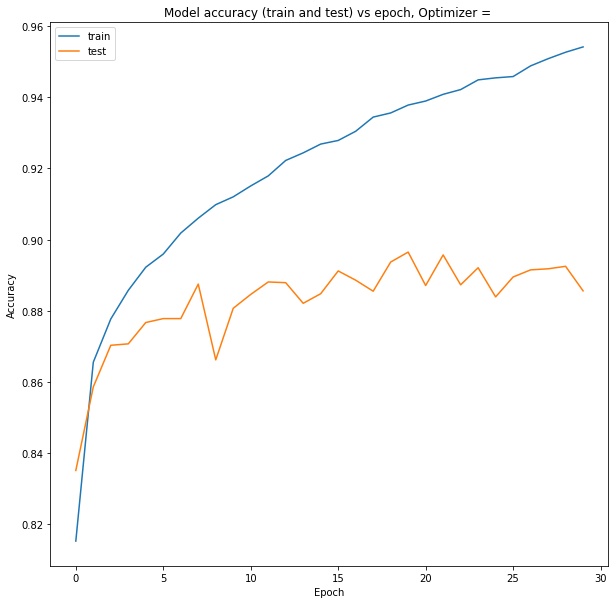

In [ ]:
test = plt.figure()
plt.figure(figsize = (10,10))
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])
plt.title("Model accuracy (train and test) vs epoch, Optimizer = ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc = 'upper left')
test.show()
print()
test_loss, test_acc = model.evaluate(X_test,Y_test,verbose=2)
print('Loss',test_loss)
print('Accuracy', test_acc)
print('Accuracy on Test Data')
# print(list_temp)

In [ ]:
test_loss, test_acc = model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4081 - accuracy: 0.8856


**Note 3:**



1.Model3 with two hidden layer, over train data : val_loss :0.1223, accuracy : 0.9522

2.Model3 with two hidden layer, over test data : val_loss : 0.4041, accuracy : 0.8868

This is case of overfitting and same is clear from validation curve.

# Adding Dropout at first hidden layer to avoid overfitting.

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.7330 - accuracy: 0.7509 - val_loss: 0.4222 - val_accuracy: 0.8487
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.860

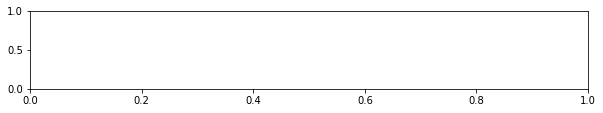

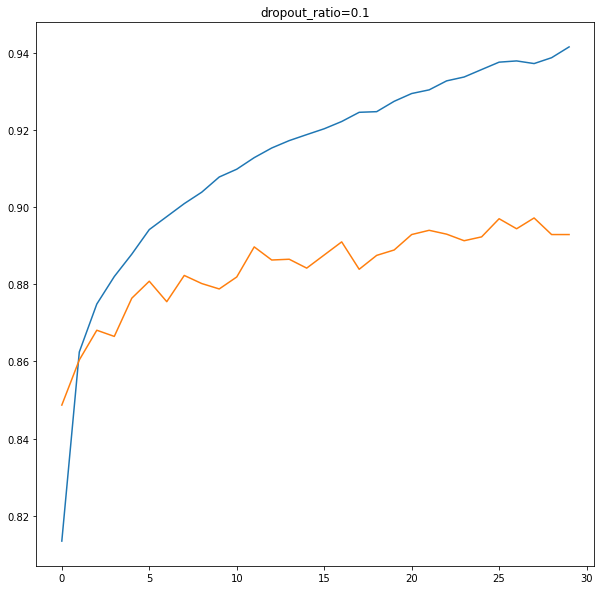

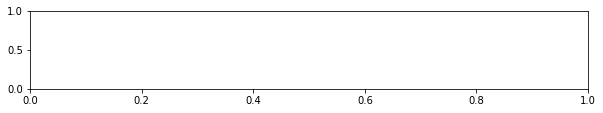

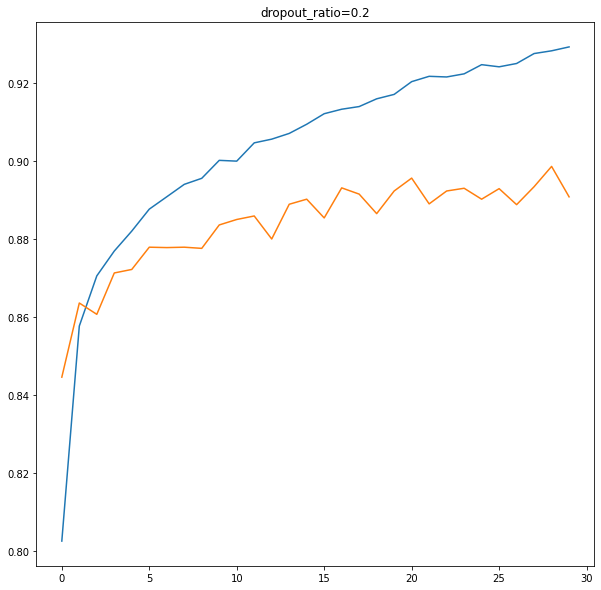

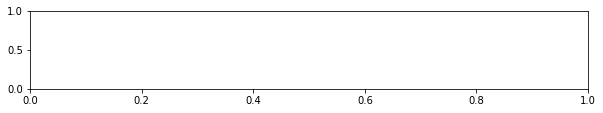

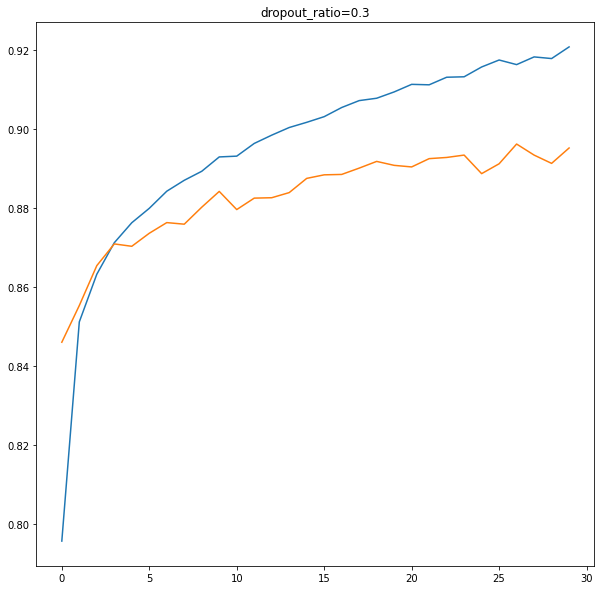

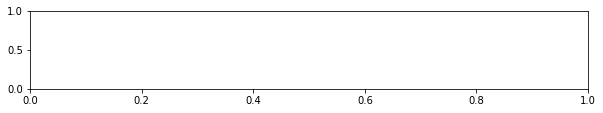

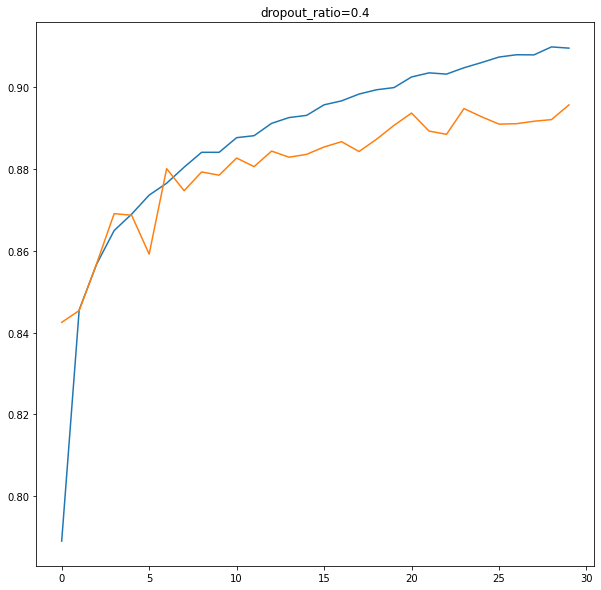

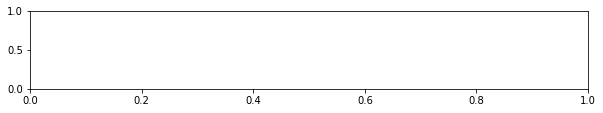

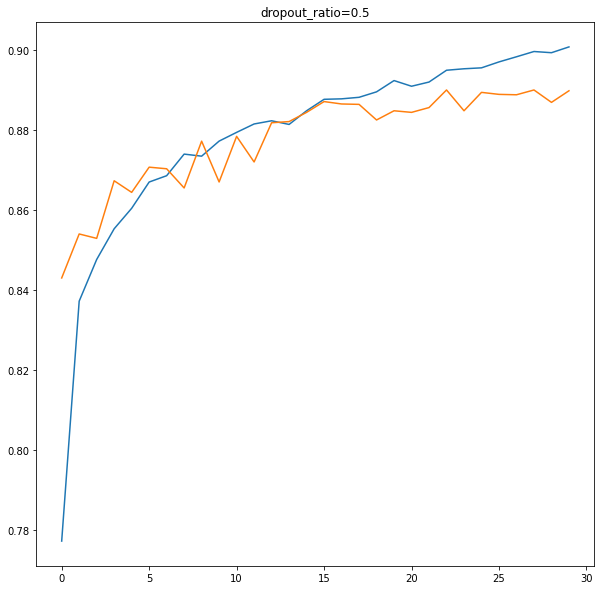

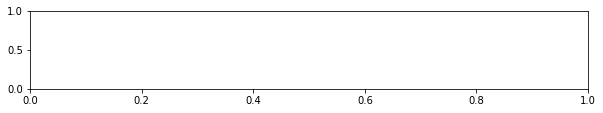

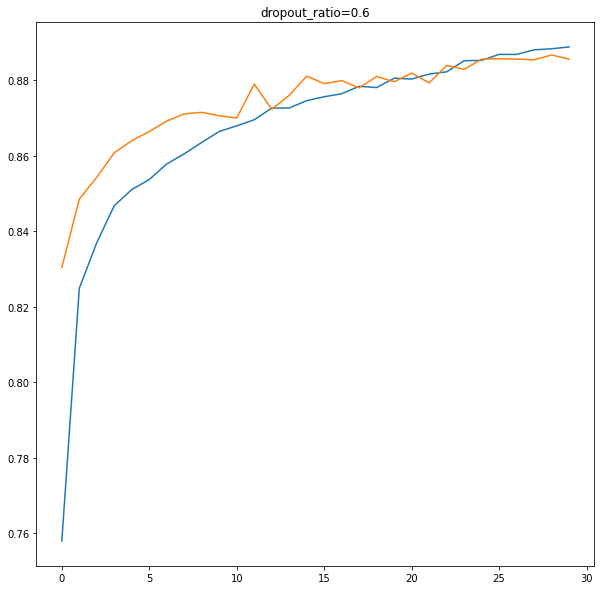

In [ ]:
#myoptimizers = ['adam']

def fit_different_optimizers(X_train,Y_train,X_test,Y_test,dropout_ratio):
  model3d = Sequential()
  model3d.add(InputLayer(input_shape=(X_train.shape[1],)))
  model3d.add(Dense(256,activation = 'relu')) # from 64 to 256
  model3d.add(Dropout(dropout_ratio))
  model3d.add(Dense(64,activation = 'relu')) # from 32 to 64
  model3d.add(Dense(10,activation = 'softmax'))
  print(model3d.summary())
  model3d.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  model3d_history = model3d.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))
  plt.figure(figsize = (10,10))
  plt.plot(model3d_history.history['accuracy'],label = 'train')
  plt.plot(model3d_history.history['val_accuracy'],label = 'test')
  plt.title('dropout_ratio='+str(dropout_ratio))
 


dropout_ratio = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in range(len(dropout_ratio)):
  plt.figure(figsize = (10,10))
  plt.subplot(6,1,i+1)
  fit_different_optimizers(X_train,Y_train,X_test,Y_test,dropout_ratio[i])


FROM VALIDATION CURVE DROPUT AT FIRST HIDDEN LAYER IS 0.3.
Now taking droput value as 0.3 at first hiden layer and tuning best droput at second hidden layer

In [ ]:
def fit_different_optimizerslayer2(X_train,Y_train,X_test,Y_test,dropout_ratio):
  model4 = Sequential()
  model4.add(InputLayer(input_shape=(X_train.shape[1],)))
  model4.add(Dense(256,activation = 'relu')) # from 64 to 256
  model4.add(Dropout(0.3))
  model4.add(Dense(64,activation = 'relu')) # from 32 to 64
  model4.add(Dropout(dropout_ratio))
  model4.add(Dense(10,activation = 'softmax'))
  print(model4.summary())
  model4.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  model4_history = model4.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))
  plt.figure(figsize = (10,10))
  plt.plot(model4_history.history['accuracy'],label = 'train')
  plt.plot(model4_history.history['val_accuracy'],label = 'test')
  plt.title('dropout_ratio='+str(dropout_ratio))

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.8137 - accuracy: 0.7153 - val_lo

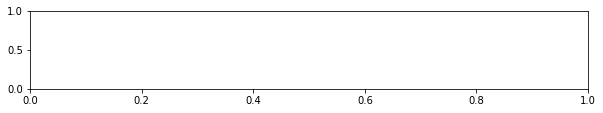

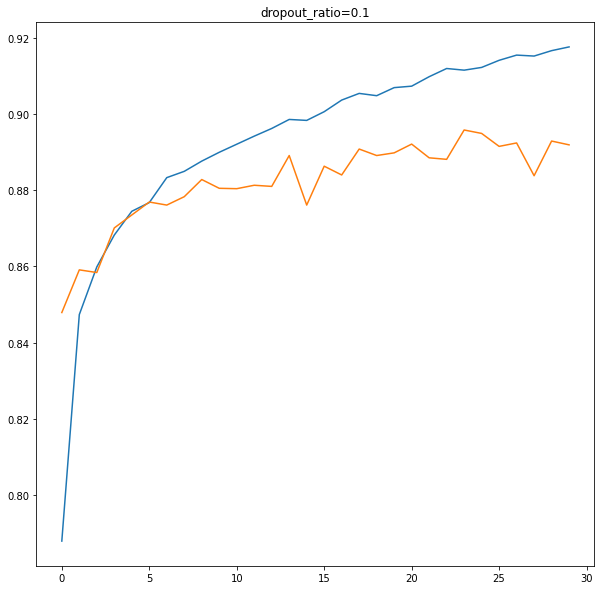

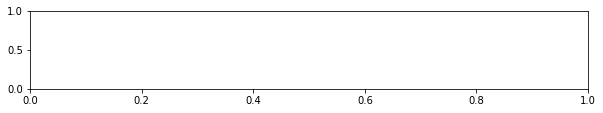

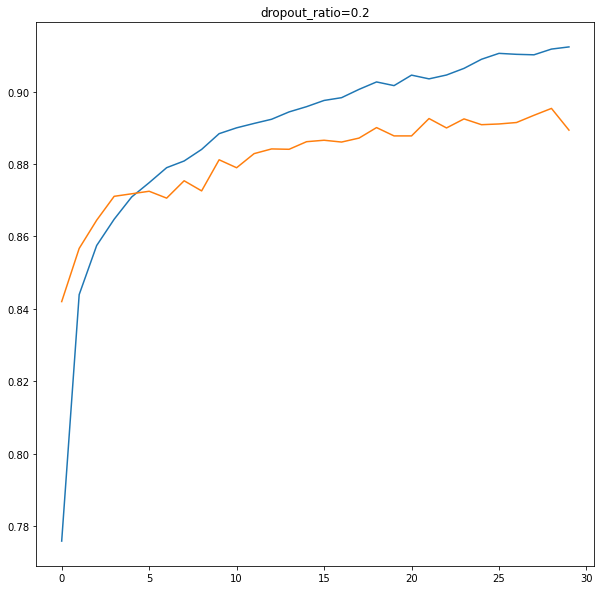

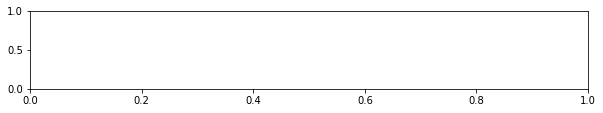

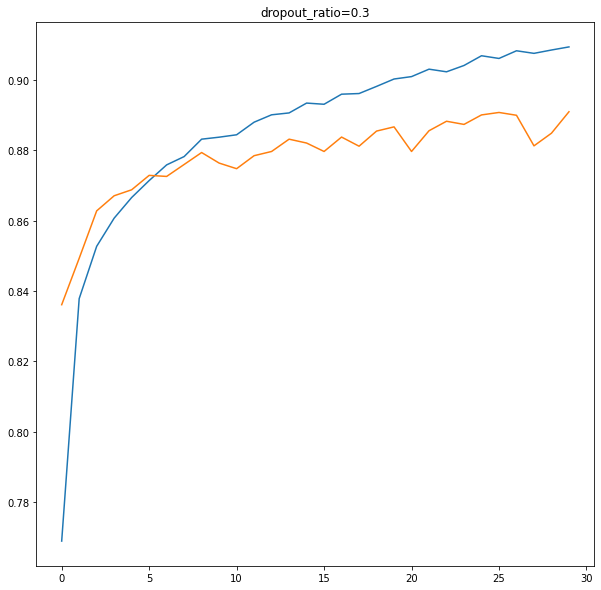

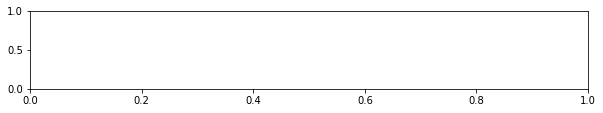

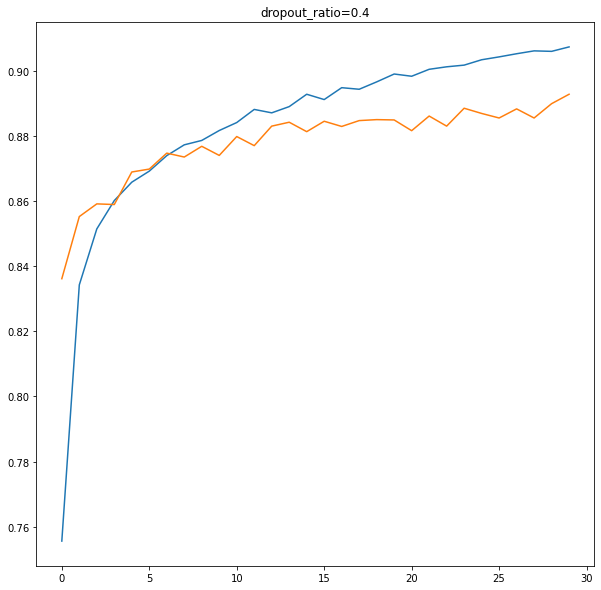

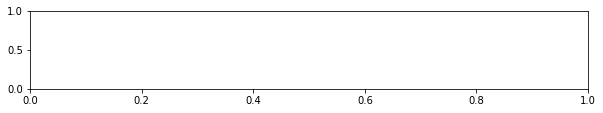

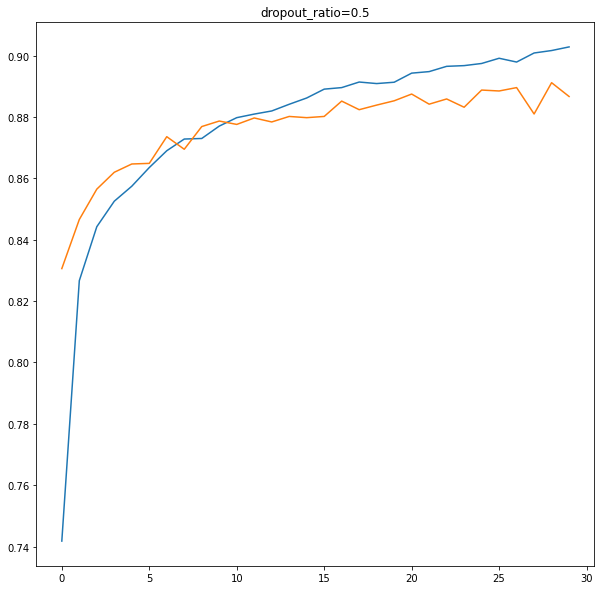

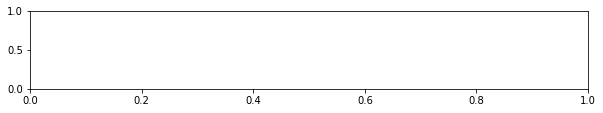

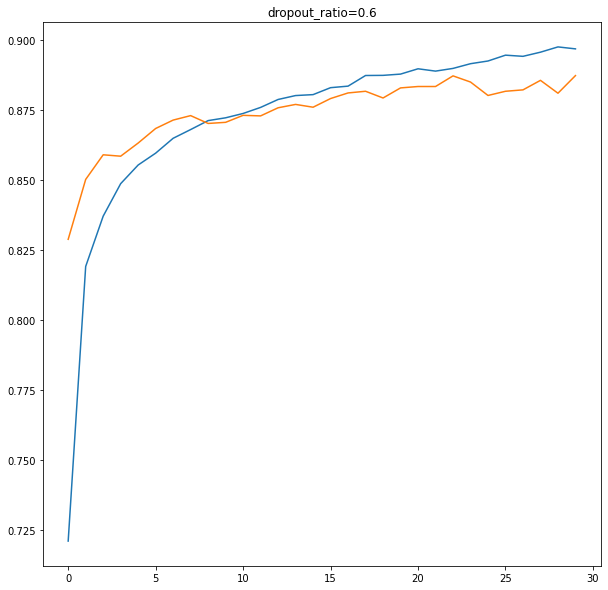

In [ ]:
dropout_ratio = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in range(len(dropout_ratio)):
  plt.figure(figsize = (10,10))
  plt.subplot(6,1,i+1)
  fit_different_optimizerslayer2(X_train,Y_train,X_test,Y_test,dropout_ratio[i])

best dropout for second hidden layer is 0.1

In [ ]:
model5 = Sequential()
model5.add(InputLayer(input_shape=(X_train.shape[1],)))
model5.add(Dense(256,activation = 'relu')) # from 64 to 256
model5.add(Dropout(0.3))
model5.add(Dense(64,activation = 'relu')) # from 32 to 64
model5.add(Dropout(0.2))
model5.add(Dense(10,activation = 'softmax'))

print(model5.summary())

# Compile the model

model5.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

## Training the model

model5_history = model5.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.8621 - accuracy: 0.6988 - val_lo

Text(0.5, 1.0, 'Validation Curve')

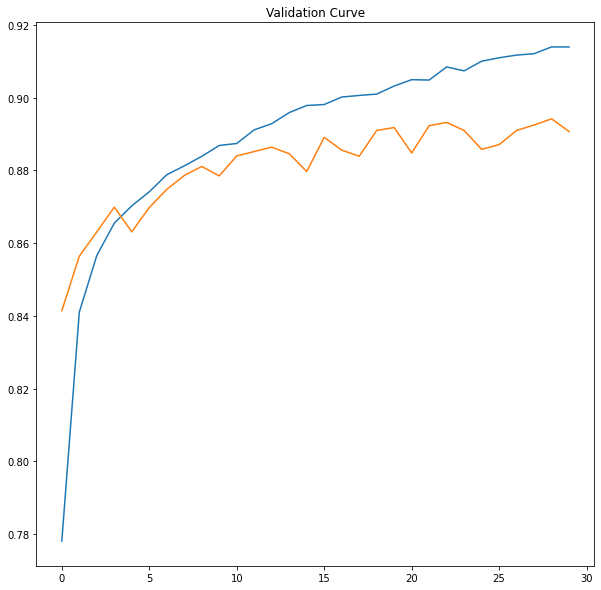

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(model5_history.history['accuracy'],label = 'train')
plt.plot(model5_history.history['val_accuracy'],label = 'test')
plt.title('Validation Curve')

In [ ]:
test_loss, test_acc = model5.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.8907


Changing Learning Rate

In [ ]:
def learningrate_tuning(X_train,Y_train,X_test,Y_test,learningrate):
  model6 = Sequential()
  model6.add(InputLayer(input_shape=(X_train.shape[1],)))
  model6.add(Dense(256,activation = 'relu'))
  model6.add(Dropout(0.3))
  model6.add(Dense(64,activation = 'relu'))
  model6.add(Dropout(0.1))
  model6.add(Dense(10,activation = 'softmax'))
  print(model6.summary())
  # Compile the model
  model6.compile(loss = 'categorical_crossentropy',optimizer =keras.optimizers.Adam(learning_rate=learningrate) ,metrics = ['accuracy'])
  model6_history = model6.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))
  # Plot
  plt.figure(figsize = (10,10))
  plt.plot(model6_history.history['accuracy'],label = 'train')
  plt.plot(model6_history.history['val_accuracy'],label = 'test')
  plt.title('Learning Rate = '+str(learningrate))
  return

  

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.8362 - accuracy: 0.7026 - val_lo

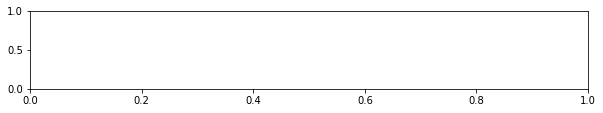

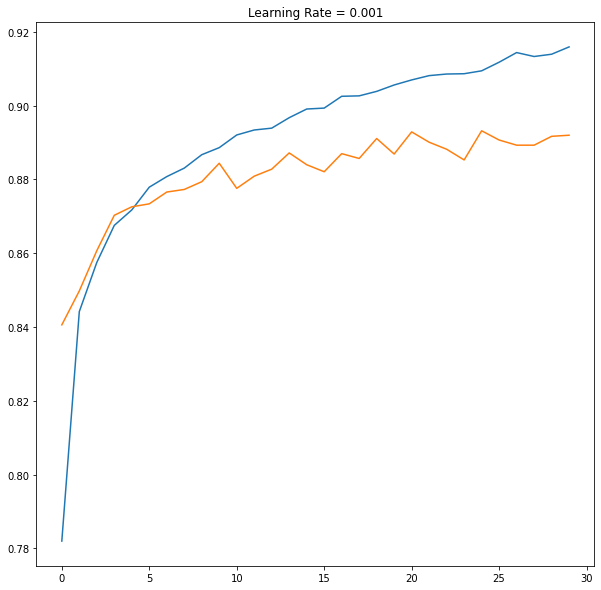

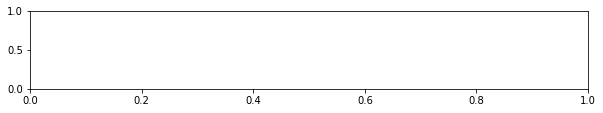

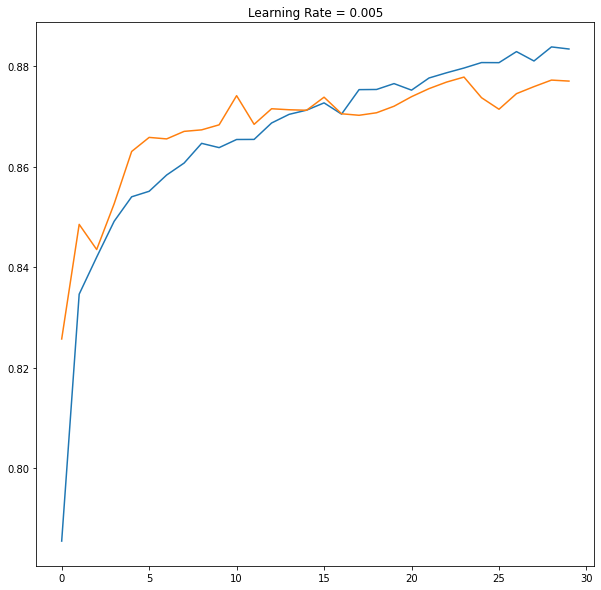

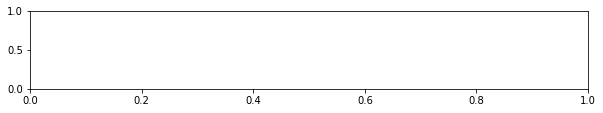

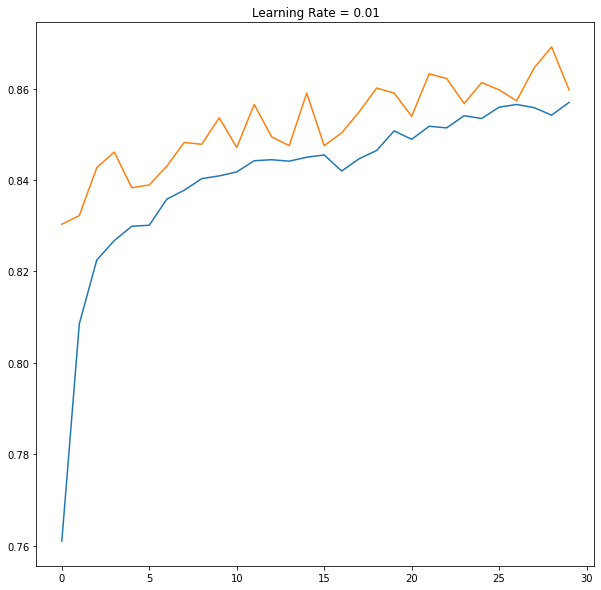

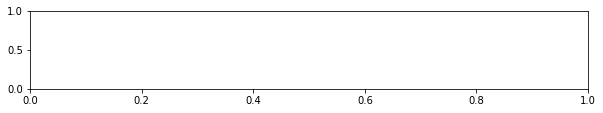

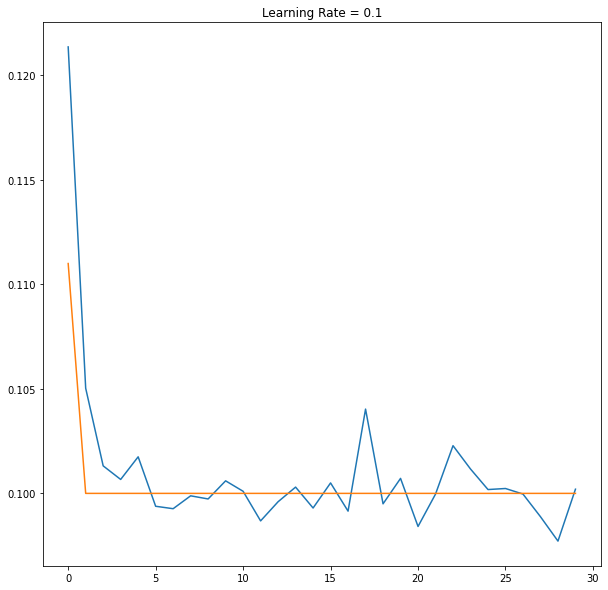

In [ ]:
learningrate = [0.001, 0.005,.01,0.1]
for i in range(len(learningrate)):
  plt.figure(figsize = (10,10))
  plt.subplot(6,1,i+1)
  learningrate_tuning(X_train,Y_train,X_test,Y_test,learningrate[i])

BEST LEARNING RATE 0.005

loss: 0.2991 - accuracy: 0.8887 - val_loss: 0.3248 - val_accuracy: 0.8828

For lower learning rate model learns in better back as in backpropagation.


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.7693 - accuracy: 0.7156 - val_lo

Text(0.5, 1.0, 'Valiadtion Curve with learning rate = 0.005 and optimizer = ADAM')

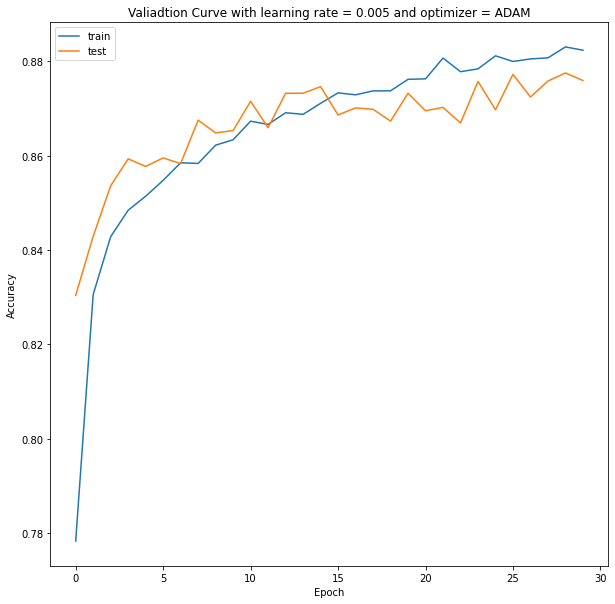

In [ ]:
model6 = Sequential()
model6.add(InputLayer(input_shape=(X_train.shape[1],)))
model6.add(Dense(256,activation = 'relu'))
model6.add(Dropout(0.3))
model6.add(Dense(64,activation = 'relu'))
model6.add(Dropout(0.1))
model6.add(Dense(10,activation = 'softmax'))
print(model6.summary())
# Compile the model
model6.compile(loss = 'categorical_crossentropy',optimizer =keras.optimizers.Adam(learning_rate=0.005) ,metrics = ['accuracy'])
model6_history = model6.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))
# Plot
plt.figure(figsize = (10,10))
plt.plot(model6_history.history['accuracy'],label = 'train')
plt.plot(model6_history.history['val_accuracy'],label = 'test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc = 'upper left')
plt.title('Valiadtion Curve with learning rate = 0.005 and optimizer = ADAM')

Now Taking  optimizer as RMsprop

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/60
469/469 [==============================] - 2s 3ms/step - loss: 1.0379 - accuracy: 0.6670 - val_lo

Text(0.5, 1.0, 'Valiadtion Curve')

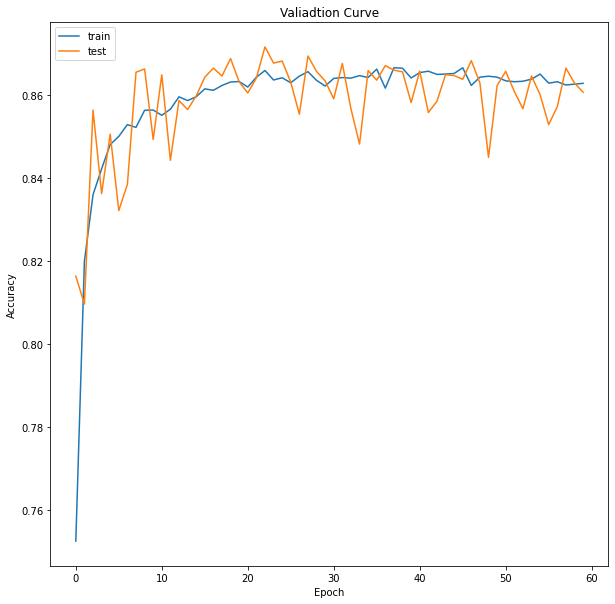

In [ ]:
model7 = Sequential()
model7.add(InputLayer(input_shape=(X_train.shape[1],)))
model7.add(Dense(256,activation = 'relu'))
model7.add(Dropout(0.3))
model7.add(Dense(64,activation = 'relu'))
model7.add(Dropout(0.1))
model7.add(Dense(10,activation = 'softmax'))
print(model7.summary())
# Compile the model
model7.compile(loss = 'categorical_crossentropy',optimizer =keras.optimizers.RMSprop(learning_rate=0.005) ,metrics = ['accuracy'])
model7_history = model7.fit(X_train,Y_train,epochs = 60,batch_size =128, validation_data = (X_test,Y_test))
# Plot
plt.figure(figsize = (10,10))
plt.plot(model7_history.history['accuracy'],label = 'train')
plt.plot(model7_history.history['val_accuracy'],label = 'test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc = 'upper left')
plt.title('Valiadtion Curve')

Useing Rmsprop Optimzier loss increase and Accuracy **decreases**

# BEST PARAMETER FOR THIS PROJECT

Hidden layer =2

Optimizer = ADAM

learning rate =0.005

Batch size =164

epoch=60

Activation = relu (Hidden layer) and Softmax (outputlayer)

Dropout at each hidden layer to avoid overfiting.




Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.7525 - accuracy: 0.7252 - val_lo

Text(0.5, 1.0, 'Valiadtion Curve with learning rate = 0.005 and optimizer = ADAM')

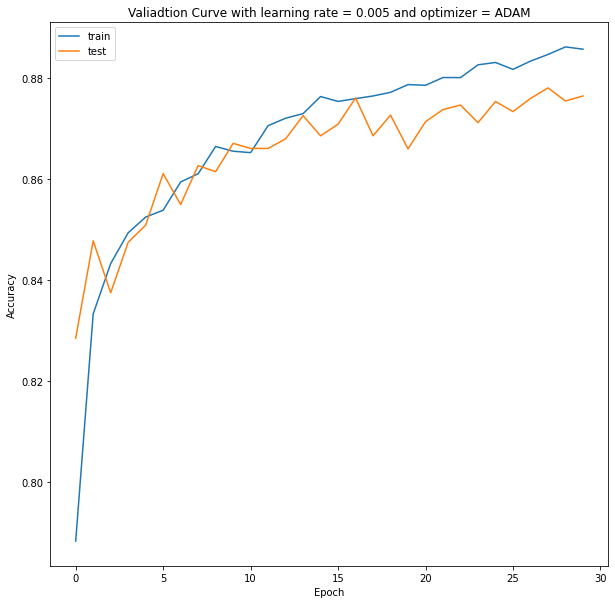

In [ ]:
modelfinalmodel = Sequential()
modelfinalmodel.add(InputLayer(input_shape=(X_train.shape[1],)))
modelfinalmodel.add(Dense(256,activation = 'relu'))
modelfinalmodel.add(Dropout(0.3))
modelfinalmodel.add(Dense(64,activation = 'relu'))
modelfinalmodel.add(Dropout(0.1))
modelfinalmodel.add(Dense(10,activation = 'softmax'))
print(modelfinalmodel.summary())
# Compile the model
modelfinalmodel.compile(loss = 'categorical_crossentropy',optimizer =keras.optimizers.Adam(learning_rate=0.005) ,metrics = ['accuracy'])
modelfinalmodel_history = modelfinalmodel.fit(X_train,Y_train,epochs = 30,batch_size =128, validation_data = (X_test,Y_test))
# Plot
plt.figure(figsize = (10,10))
plt.plot(modelfinalmodel_history.history['accuracy'],label = 'train')
plt.plot(modelfinalmodel_history.history['val_accuracy'],label = 'test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc = 'upper left')
plt.title('Valiadtion Curve with learning rate = 0.005 and optimizer = ADAM')

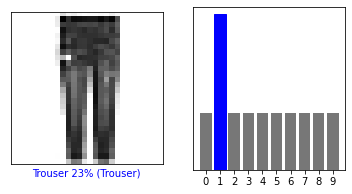

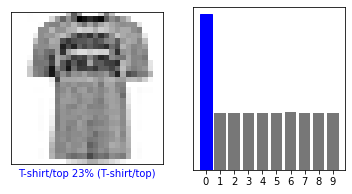

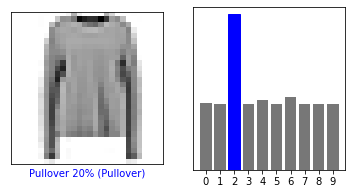

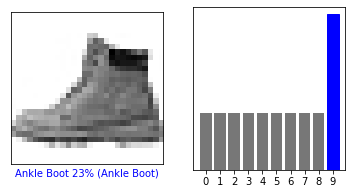

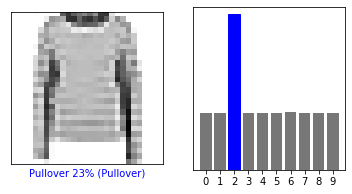

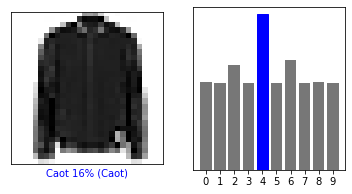

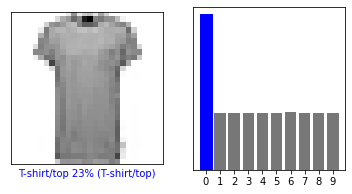

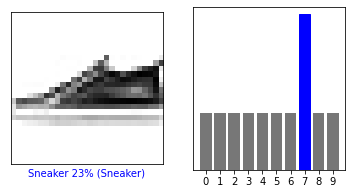

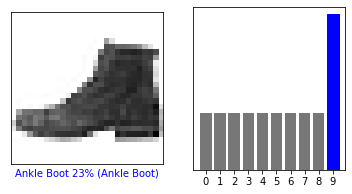

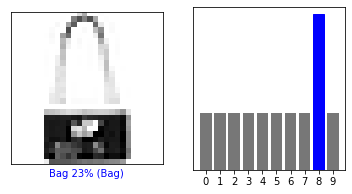

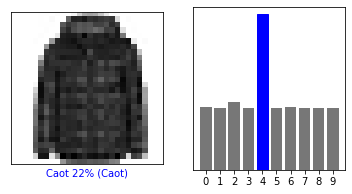

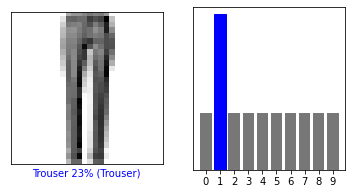

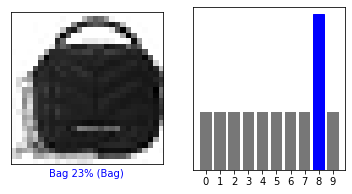

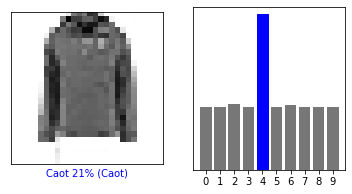

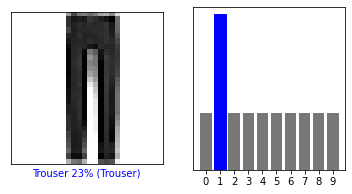

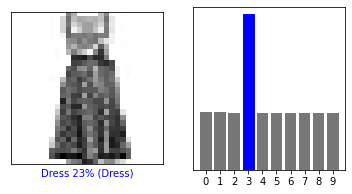

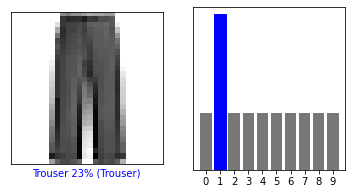

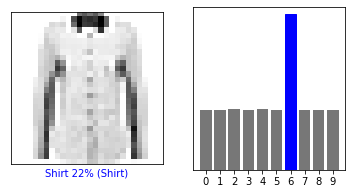

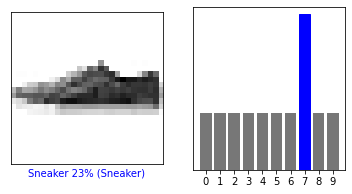

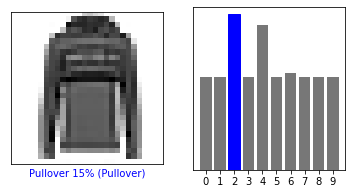

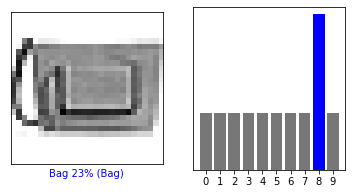

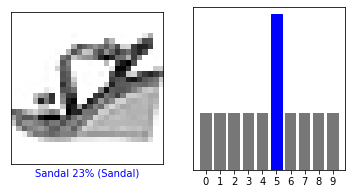

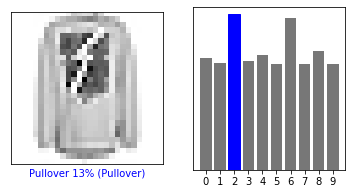

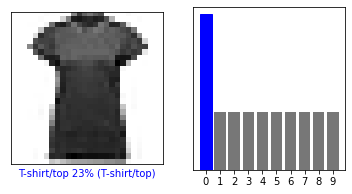

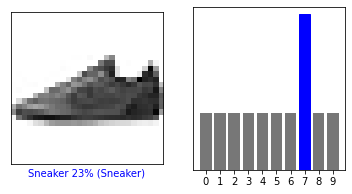

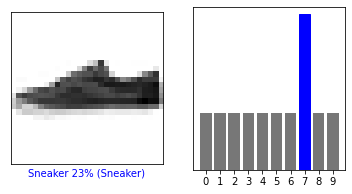

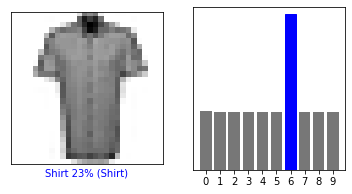

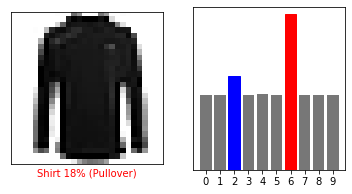

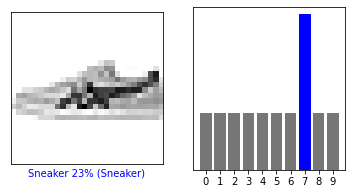

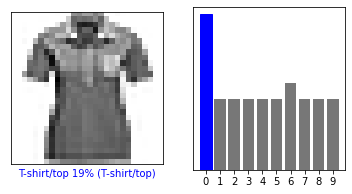

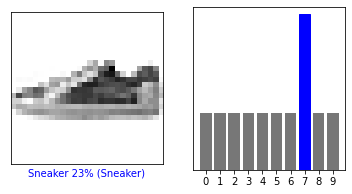

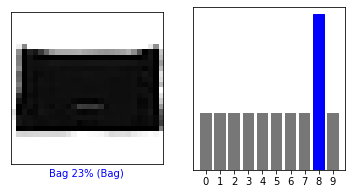

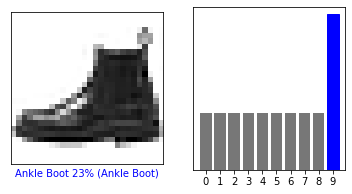

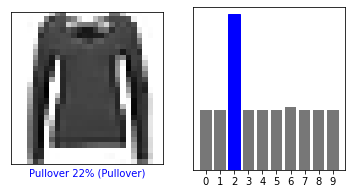

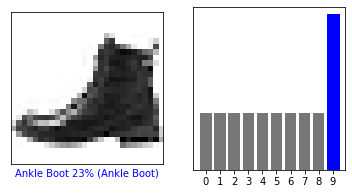

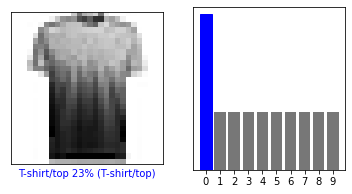

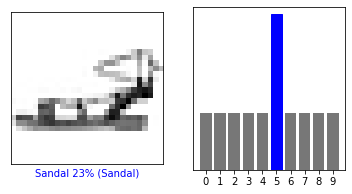

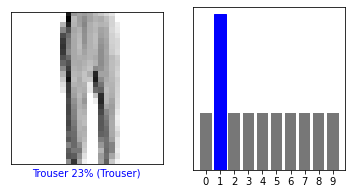

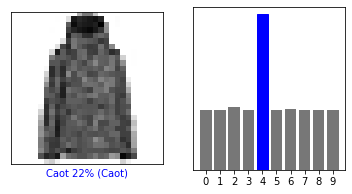

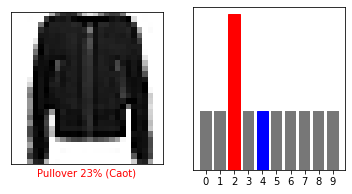

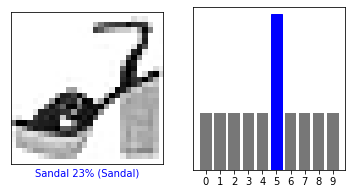

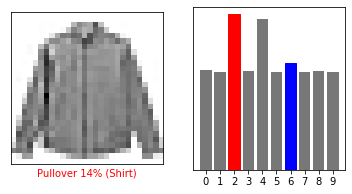

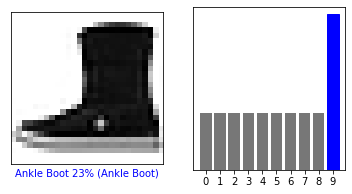

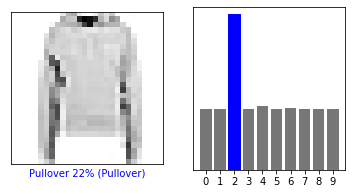

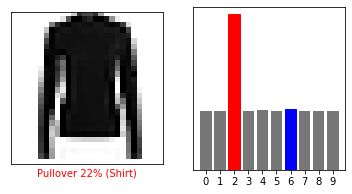

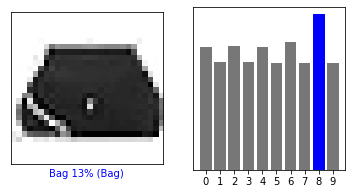

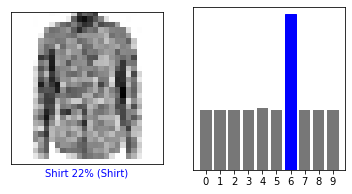

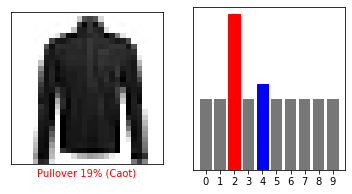

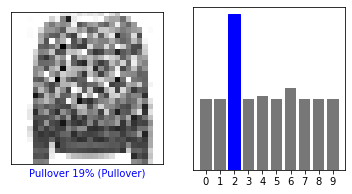

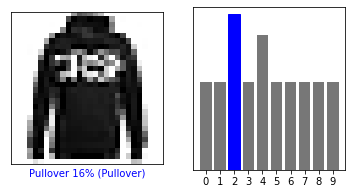

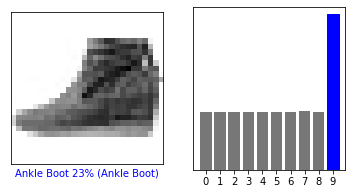

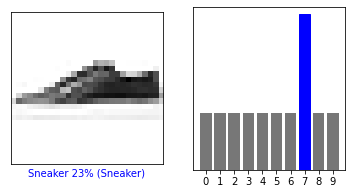

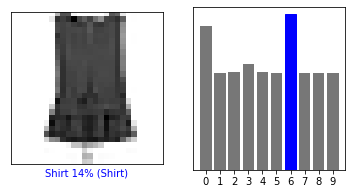

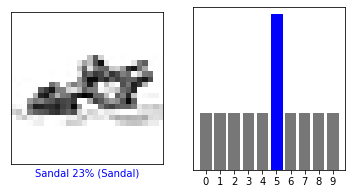

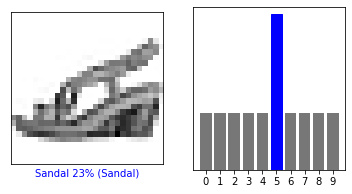

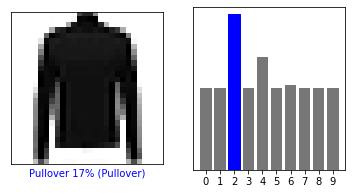

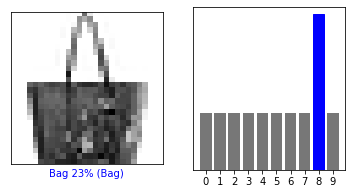

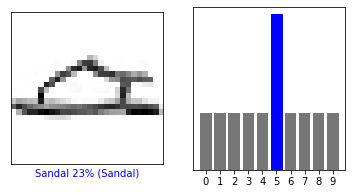

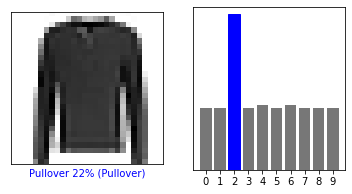

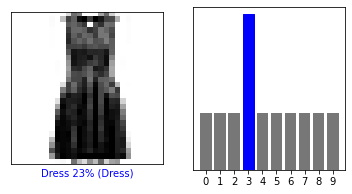

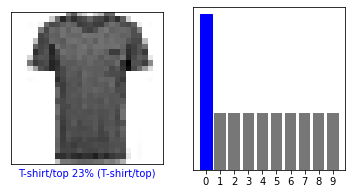

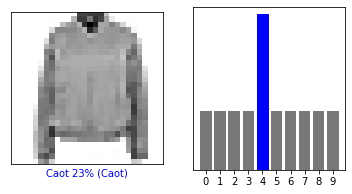

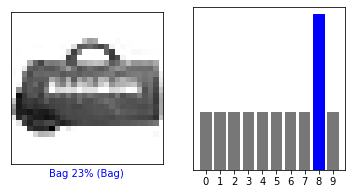

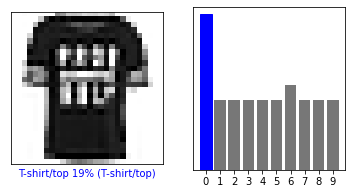

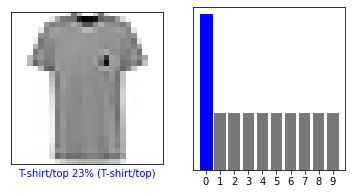

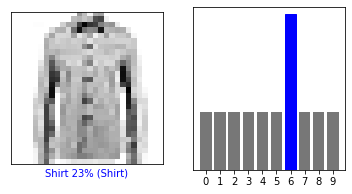

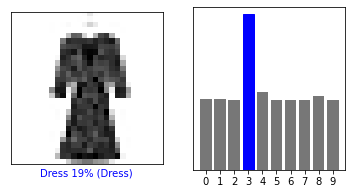

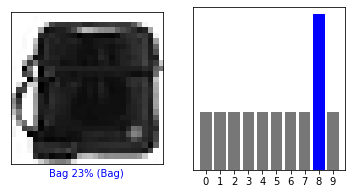

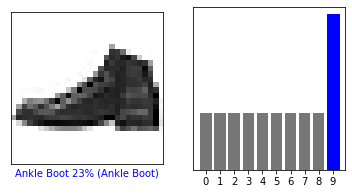

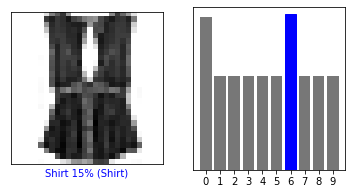

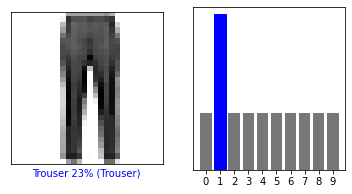

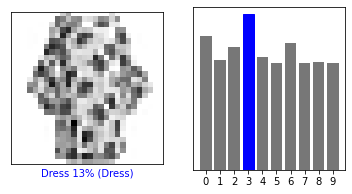

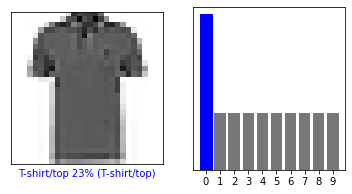

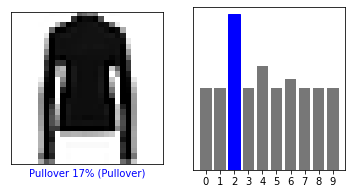

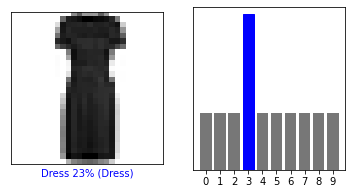

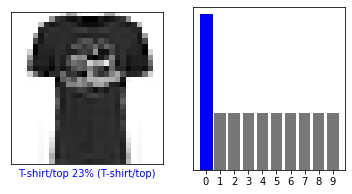

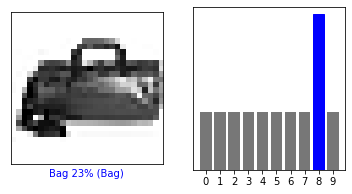

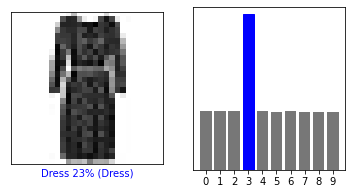

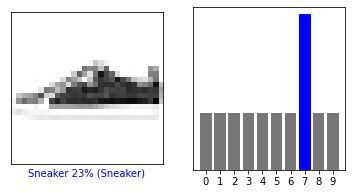

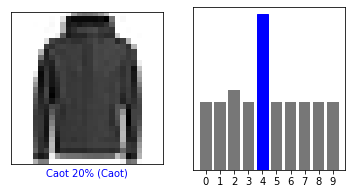

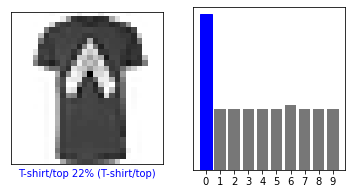

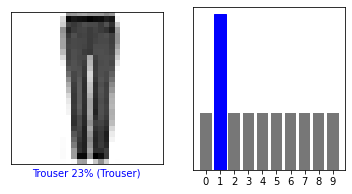

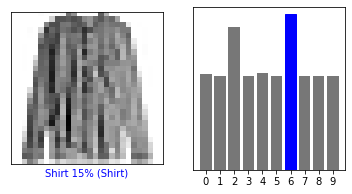

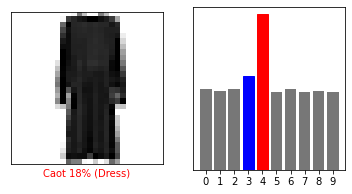

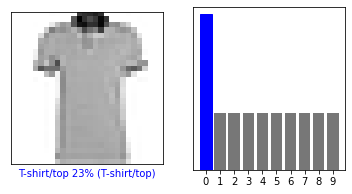

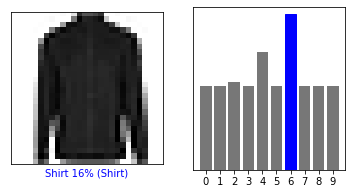

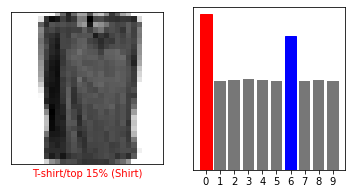

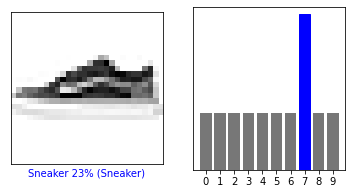

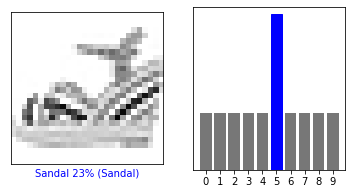

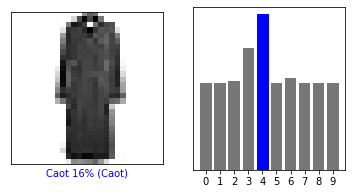

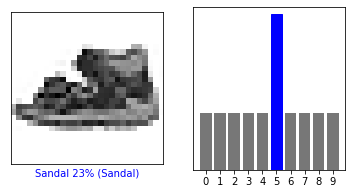

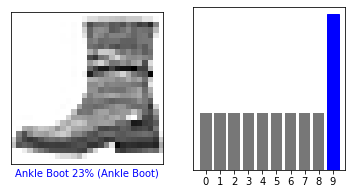

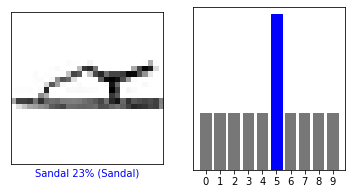

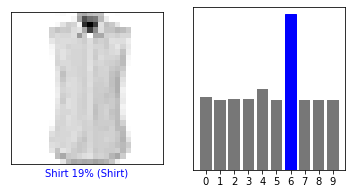

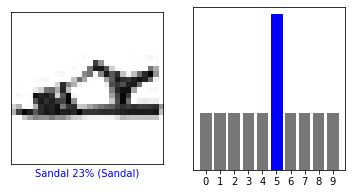

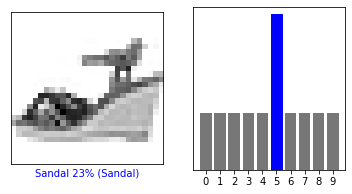

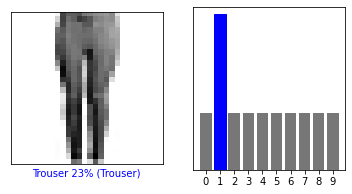

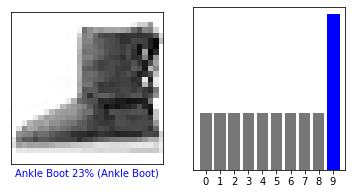

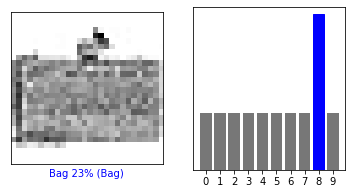

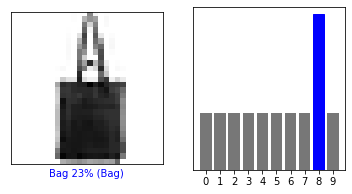

In [ ]:
probability_modelfinalmodel = tf.keras.Sequential([modelfinalmodel, tf.keras.layers.Softmax()])
predictionmodelfinalmodel = probability_modelfinalmodel.predict(X_test)
for j in range(200,300):
  i=j
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictionmodelfinalmodel[i], Y_test, X_test_test)
  plt.subplot(1,2,2)
  plot_value_array(i, predictionmodelfinalmodel[i], Y_test)
  plt.show()
